# lecture 0 - 量子コンピュータのための線形代数と量子力学

## 0-0線形代数学

### 複素数の特徴

複素数は、実数 $a$ と $b$ があり、$i^2 = -1$ を満たす虚数 $i$ がある場合、 $z = a + bi$ の形で表現される数を意味します。複素数は間違いのように、加算、減算、乗算、除算が可能です。

以下のセルを実行して、非常に単純な複素数の加算と乗算をしましょう。


In [1]:
a = 2 + 3j
b = 5 - 2j
print("a + b=", a+b)
print("a * b=", a*b)

a + b= (7+1j)
a * b= (16+11j)


乗算の過程をしばらく詳しく見てみましょう。 $$(2 + 3i)\times(5 - 2i) = (2\times5 + 2\times(-2i) + 3i\times5 + 3i\times(-2i)) = 10 - 4i + 15i - 6i^2 = 10 - 4i + 15i + 6 = 16 + 11i $$

複素数は、ペア複素数（Complex Conjugate）と呼ばれる特別なペアを定義して使用します。複素数 $z = a + bi$ のペア複素数は通常 $\bar z$ で表され、その値は $\bar z = a - bi$ と同じです。複素数とペア複素数が加算と乗算で持つ特別な性質を次のセルで確認しましょう。

In [2]:
a = 2 + 3j
a_bar = 2 - 3j
print("a + a_bar = ", a + a_bar)
print("a * a_bar = ", a * a_bar)

a + a_bar =  (4+0j)
a * a_bar =  (13+0j)


複素数とペア複素数を加算または乗算すると、結果は間違いになります。

複素数は、複素数の**長さ**とも呼ばれる絶対値 (modulus, $|z|$) を持ちます。複素数の絶対値は、座標平面でx軸を実数軸に、y軸を虚数軸にとったときの原点から複素数までの**距離**に対応する正の実数（real）値です。下のノートブックは、$ z = 3 + 4i $の絶対値を座標平面に描いたものです。私たちが知っているように、この複素数の絶対値は$ 5 = \sqrt{3^2 + 4^2}$です。

複素数の絶対値を計算するために、ペア複素数が役に立つが、 $|z|^2 = z \times \bar z$ を満足し、非常に簡単に次のように証明が可能です。 $$(a + bi)(a - bi) = a^2 -abi +abi -b^2i^2 = a^2 + b^2$$

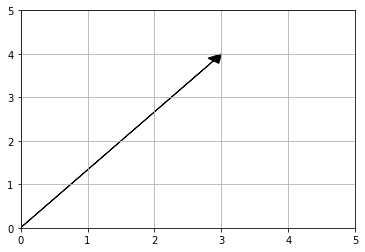

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

z1 = 3 + 4j

x_min = 0
x_max = 5.0

y_min = 0
y_max = 5.0

def plot_complex_number_geometric_representation(z,x_min,x_max,y_min,y_max):

    fig = plt.figure()

    ax = plt.gca()

    a = [0.0,0.0]
    b = [z.real,z.imag]

    head_length = 0.2

    dx = b[0] - a[0]
    dy = b[1] - a[1]

    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length

    ax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=head_length, head_length=head_length, fc='black', ec='black')

    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    plt.grid(True,linestyle='-')

    plt.show()


plot_complex_number_geometric_representation(z1,x_min,x_max,y_min,y_max)

上記で概説した複素数の性質をまとめると、次のような複素数の一般的な性質を得ることができます。ここで $z$ と $w$ は任意の複素数です。 $$ z + w = w + z$$ $$ zw = wz$$ $$ \overline{z + w} = \bar z + \bar w$$ $$ \overline{zw} = \bar z \bar w$$ $$ z\bar z = \bar zz = |z|^2$$ $$ \bar{\bar z} = z$$ $$ |z| = |\bar z|$$ $$ |zw| = |z||w|$$$$ |z+w| \leq |z| + |w| （三角式）$$ $$ z^{-1} = \frac{\bar z}{|z|^2}$$

### 複素数の表現 - オイラーの公式と極座標系

これまで複素数を$a + bi$の形で表現してきましたが、複素数を表現する他の方法も一緒に調べてみましょう。 Euler's formulaは、数学者レオンハルトオイラーの名前が付いた式で、三角関数と指数関数との関係を表します。間違いであり、[ラジアン](https://ko.wikipedia.org/wiki/%EB%9D%BC%EB%94%94%EC%95%88)である$\theta$があるとき、次の公式が満たされ、これをオイラーの公式と呼びます。 $$e^{i\theta} = cos\theta + i sin\theta$$

オイラーの公式を活用すれば、複素数を極座標系を使って表現することができ、以下を満足します。 $$z = a + bi = |z|e^{i\theta} = |z|(cos\theta + i sin\theta) = |z|cos\theta + i|z|sin\theta$$ $ $\therefore a = |z|cos\theta, b=|z|sin\theta, tan\theta = \frac{b}{a}, \theta = \arctan\frac{b}{a}$$

ここで、 $\theta$ は[複素数の偏角](https://ko.wikipedia.org/wiki/%ED%8E%B8%EA%B0%81_(%EC%88%98%ED%95%99))と呼ばれ、複素数が実数と虚数を座標軸とする複素数平面における実数軸と複素数との間の角度の大きさを意味します。

![ソースウィキペディア](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Complex_number_illustration_modarg.svg/440px-Complex_number_illustration_modarg.svg.png)

ウィキペディアから取得した上記の画像では、$ r = | z | $で、$ \ phi = \ theta $です。

ちなみに、複素数のペア複素は極座標系で $\bar z = e^{-i\theta}$ と同じです。複素数の極座標系表現の一般的な特性は次のとおりです。 $z = |z|e^{i\theta}$ と $w = |w|e^{i\phi}$ はともに複素数です。

$$zw = |z||w|e^{i\theta}e^{i\phi} = |z||w|e^{i(\theta + \phi)}$$ $$\frac{ 1}{e^{i\theta}} = e^{-i\theta} = \overline{e^{i\theta}}$$ $$e^{\pm2\pi i} = cos(\pm2 \pi)+isin(\pm2\pi) = 1, \therefore ei^{(\theta \pm2\pi)} = e^{i\theta}e^{\pm2\pi i} = e^{i \theta}$$

### ベクトル

[ベクトル](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)の最も簡単な説明は、 **「ベクトルはサイズと方向の量です」**です。やや複雑な説明は[Wiki](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)を参照してください。

通常、ベクトルは「行」と「列」で表現され、次元を持ちます。例をあげましょう。 $$A = \begin{pmatrix} 1, &amp;2 \end{pmatrix}$$

$$B = \begin{pmatrix}3\2\1\end{pmatrix}$$

Aは2次元の行ベクトル、Bは3次元の列ベクトルです。私たちがベクトルと呼ぶのは一般に**列ベクトル**であり、n次元のベクトル$\vec{v}$は次のように表現できます。 $$\vec{v} = \begin{pmatrix}v_1\v_2\dots\v_n\end{pmatrix}$$

ベクトルも数字と同様に加算、減算、乗算、除算が可能です。ここで、ベクトルの加算と乗算について見てみましょう。ベクトルの合計は次のとおりです。 $$\begin{pmatrix}a_1\a_2\a_3\end{pmatrix}+\begin{pmatrix} b_1\b_2\b_3\end{pmatrix}=\begin{pmatrix} a_1+b_1\a_2+b_2\a_3+b_3 \end{pmatrix}$$

よく使う表現をつかみ、次に進むようにしましょう。ベクトルの合計で$ j $行の要素だけを言及したい場合は、次のように簡潔に使用します。 $$(\vec{v} + \vec{w})_j = v_j + w_j$$

追加したい2つのベクトルの形状と次元が異なる場合はどうなりますか？原則として、2つのベクトルの形状が異なる場合、ベクトルの加算はできません。しかし、numpyなどのライブラリなどは自動的に2つのベクトルの次元を合わせて加算を行います。下のセルで確認してみましょう。

In [4]:
import numpy as np
A = np.array([[1,2,3]])
B = np.array([[7], [10], [9]])
A+B

array([[ 8,  9, 10],
       [11, 12, 13],
       [10, 11, 12]])

ベクトルは定数や他のベクトルと乗算することもできます。ベクトルと定数の積は非常に単純です。 $$c\times\begin{pmatrix}a_1\a_2\a_3\end{pmatrix}=\begin{pmatrix} ca_1\ca_2\ca_3\end{pmatrix}$$

ベクトルに正の定数を掛けると、ベクトルが方向を維持し、絶対値が増加します。ベクトルに負の定数を掛けると、ベクトルは方向が逆になり、絶対値は増えます。

### ベクトル空間 (Vector Space)

ベクトル空間または線形空間は、要素を互いに加算したり、与えられた倍数に増減したりできる空間で、ベクトル空間の要素をベクトルと呼びます。ベクトル空間内のベクトルの線形和とスカラー積（ベクトルと定数の積）の結果ベクトルもベクトル空間の要素になります。ベクトル空間について、次の4つが成立します。

- 加算のための恒等元(identity element)存在:ベクトル空間$V$には特定の要素0が存在し、すべての$v\in V$に対して$v+0=0+v=v$
- 加算のための逆元の存在：ベクトル空間$ V $の任意の要素$ v $に対して、$ v + u = u + v = 0 $を満たす$ u \ in V $が存在します。
- 交換法則（commutativity）成立 : $\forall u, v\in V$に対して $u+v=v+u$ が成立する。
- 結合法則（Associativity）成立 : $\forall u, v, w \in V$に対して $(u+v)+w=u+(v+w)$ が成立する。
- 分配法則(Distributivity) 成立: スカラー定数 $c$ と $d$, $\forall u, v \in V$ に対して、 $c(u + v) = cu + cv$ および $(c + d)v = cv + dv$が成立する。

### マトリックス

[行列](https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC)は数値などを長方形の形で配列したもので行と列を持ちます。 行列の次元は行$m$と列$n$の次元を使って$n\times m$で表現します。前述のベクトルの場合は、1次元の列とn次元の行を持つ$n \times 1$次元の行列と見なすことができます。

行列もベクトルと同様に和と定数が可能で、次のようになります。

$$\begin{pmatrix}a_{11}&amp;a_{12}\a_{21}、&amp;a_{22}\end{pmatrix}+\begin{pmatrix}b_{11}、&amp;b_{12}\b_ {21}、&amp;b_{22}\end{pmatrix}=\begin{pmatrix}a_{11}+b_{11}&amp;a_{12}+b_{12}\a_{21}+b_{21}、 &amp;a_{22}+b_{22}\end{pmatrix}$$

$$c \times \begin{pmatrix} a_{11}&amp;a_{12}\a_{21}、&amp;a_{22}\end{pmatrix}=\begin{pmatrix} ca_{11}＆ca_{12} \ca_{21}&amp;ca_{22}\end{pmatrix}$$

これで、行列とベクトルの乗算について学ぶ時が来ました。 2 つの行列 $A、B$ がある場合、$A$ の行の次元と $B$ の列の次元が同じ場合、$AB$ を計算できます。たとえば、$2\times3$ 行列 $A$ と $3 \times 2$ 行列 $B$ の乗算は次のようになり、乗算の結果として生まれた行列の次元は $2 \times 2$ になります。

$$\begin{pmatrix}1&amp;2&amp;3\4、&amp;5&amp;6\end{pmatrix}\begin{pmatrix}1、&amp;2\3、&amp;4\5、&amp;6\end{pmatrix}=\ begin{pmatrix} 1 *1 + 2* 3 + 3 *5 &amp; 1* 2 + 2 *4 + 3* 6 \ 4 *1 + 5* 3 + 6 *5 &amp; 4* 2 + 5 *4 + 6* 6 \end{pmatrix}$$

この乗算を行列の**行列積**と呼び、素晴らしい式で表現すると、

行列 $A,B$ がそれぞれ $m\times n$, $n \times p$ の次元を持つ場合、2 行列の行列積 $C = AB$ の $i$列 $j$行の成分を $c_{ ij}$と言うとき、$$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{in}b_{nj} = \displaystyle\sum_{k =1}^{n} a_{ik}b_{kj}$$ が成立します。ベクトルの行列乗算も同じ規則に従います。たとえば、$n \times 1$次元のベクトル $v$ は、$m \times n$ 次元の行列 $M$ や $1 \times n$ 次元の行ベクトルなどと乗算が可能です。 2つのケースを下のセルを実行して確認してみましょう。

In [5]:
A = np.array([[7], [10], [9]])
B = np.array([[1,2,3]])
C = np.array([[1, 2, 3], [5, 6, 7], [8,9,10]])

print("AB = ", np.matmul(A,B))
print("BA = ", np.matmul(B,A))
print("CA = ", np.matmul(C, A))
print("AC = ", np.matmul(A, C))

AB =  [[ 7 14 21]
 [10 20 30]
 [ 9 18 27]]
BA =  [[54]]
CA =  [[ 54]
 [158]
 [236]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

上記の計算からわかるように、$ 3 \ times 1 $ベクトル$ A $と$ 3 \ times 3 $行列$ C $の積$ AC $はエラーを返します。例に示すように、行列はベクトルと演算でき、この場合、行列をベクトルに作用する**関数**として見ることができます。たとえば、$2 \times 1$ 次元の $\vec{v}$ ベクトルに $3 \times 2$ 次元の $M$ 行列を適用した結果、$M\vec{v}$ は $3$ 次元の新しいベクトルになります。この場合、行列は、2次元のベクトル空間のベクトルを3次元のベクトル空間に変換する関数の役割を果たしたものになります。

行列の関数機能に関して興味深いことの1つは、行列がこのように関数と同じ機能をするときに行列の積が合成関数を作成する過程と深く関連していることです。 2 つの関数 $f、g$ がある場合、両方の関数の合成 $f \circ g$ は次のようになります。 $$f \circ g(x) = f(g(x))$$ このとき関数 $f(\vec{v}) = M\vec{v}, g(\vec{v}) = N\vec {v}$ なら $$f \circ g(x) = f(g(x)) = f(N\vec{v}) = MN\vec{v}$$ $$\therefore f \circ g = MN$$になります。

上記のセルの例で見逃すべき興味深い結果の1つは、$ 1 \ times n $次元のベクトルと$ n \times 1 $次元のベクトルを掛けたときに、1つの定数が計算の結果であることです。 scalar product) または 点積(dot product)または内積(inner product)と呼びます。

ベクトルの内積は幾何学的に次の関係を満たす。 2 つのベクトル $u ,v$ の内積の $u \cdot v = |u||v|cos\theta$ の定数値で、この値は 2 つのベクトルの絶対値と 2 つのベクトルがなす角度の $cos\theta$を乗算した値で、2つのベクトルのうちの1つを他の1つのベクトルに垂直方向に投影することで、垂直方向に投影された長さの値と残りのベクトルの長さの値を乗算するのと同じ意味を持ちます。内積の結果はスカラー定数で、2つのベクトルがなす角度の大きさと2つのベクトルの絶対値にのみ影響されます。

一般に、ベクトル空間のベクトルは列ベクトルを意味するため、ベクトルの転置行列を定義した後、ベクトルとベクトルのスカラー積を定義します。

ベクトルと行列の[前置行列](https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC)とは、行列の行と列の数を変えることで、行列を主対角線を基準にして反転して得られると理解できます。

たとえば、ベクトル $v$ が $A=\begin{pmatrix}1\2\3\end{pmatrix}$ の場合、$A$ の前置行列 $A^T$ は $\begin{pmatrix} 1&amp;2&amp; 3 \end{pmatrix}$ になります。転置行列は、$(MN)^T = N^TM^T$ と $(M^T)^T = M$ を満たします。

前置行列の定義がこのような場合、ベクトル空間 $V$ のベクトル $u、v$ のスカラー積は次のように定義されます。 $$a \cdot b = a^Tb$$

行列の乗算に関連する重要な性質の1つは、行列の乗算は、交換法則が成立しない性質（non-commutativity）を持つことです。たとえば、行列 $M,N$ がある場合は $MN \neq NM$ を意味します。この重要な特性は、次のセルを実行することで簡単に確認できます。

In [ ]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5, 6], [7,8]])
print("AB = \n", np.matmul(A,B))
print("BA = \n", np.matmul(B,A))

行列演算の一般的な特徴は、次のように整理できます。適切な次元の行列 $M,N,P$ と任意のスカラー定数 $c,d$ があるとき $$M+N = N +M$$ $$(M+N)+P = M+(N +P )$$ $$c(M+N) = cM+cN$$ $$c+d)M = cM+dM$$ $$c(MN) = (cM)N = M(cN) = (MN) c$$ $$(MN)P = M(NP)$$ $$(M+N)P = MP+NP$$ $$M(N +P) = MN +MP$$ $$通常、MN \neq NM$$

行列のこのような特性から得られる重要な概念 - 線形関数（linear function） - について言及することで行列の紹介を終えたいと思います。

関数 $f$ が関数の任意の入力 $x,y$ に対して $f(x + y) = f(x) + f(y)$ と $f(cx) = cf(x)$ を満たす場合この関数が**線形性**を持つとし、このときこの関数を線形関数と呼びます。前述のように、関数が行列として表現できる場合、この関数は行列の線形性のために自然に線形関数になります。

### 複素数行列

複素数行列は、複素数を含む行列の要素を持つ行列を意味します。非常に簡単に例を挙げると、 $A = \begin{pmatrix} 2, &amp; 1+i \ -i, &amp; 5+i \end{pmatrix}$ と同じです。複素数行列は実数行列とは別に定義され、頻繁に使用される2つの演算があります。 1つは1）ペア行列（complex conjugate of matrix）であり、もう1つは2）ペア前置行列（conjugate transpose matrix）です。

ペア行列は、複素数行列のすべての複素数がペア複素数に変換された行列を意味します。たとえば、真上の行列 A のペア行列は、 $\bar A = \begin{pmatrix} 2, &amp; 1-i \i, &amp; 5-i \end{pmatrix}$ になります。複素数行列のペア転置行列は、ペア行列を転置したもので、上記の行列Aのペア転置行列は $A^{\dagger} = \begin{pmatrix} 2, &amp; -i \ 1-i, &amp; 5 +i \end{pmatrix}$ になります。

複素数行列のペア行列とペア前置行列は、次元が適切な複素数行列$ M、N $に対して次のような特性を持ちます。 $$\overline{MN} = \bar{M}\bar{N}$$ $$(MN)^{\dagger} = N^{\dagger}M^{\dagger}$$ $$\overline{ \bar M} = M$$ $$(M^{\dagger})^{\dagger} = M$$

複素数行列も実数行列と同様に内積を定義できます。注意すべき点は、複素数ベクトルと行列の場合はペア転置行列が使用されることです。 $v,u$ が複素行列 (ベクトルを含む) の場合、2 つの行列の内積 $v \cdot u = v^{\dagger}u$ です。

### ヒルベルト空間 (Hilbert space)

ヒルベルト空間は、線形ベクトル空間の内積が定義されるベクトル空間を意味する。したがって、実数、複素数に関係のないすべてのn次元ベクトルとその内積が定義されているバックタ空間はすべてヒルベルト空間です。

ヒルベルト空間は内積が定義され存在する空間であるため、ベクトル間の内積の性質を利用したいくつかの重要な概念が導入されます。

#### 直交ベクトル(Orthogonal vector)

ヒルベルト空間 $H$ の 2 つのベクトル $v、u$ の内積が 0 のとき、これら 2 つのベクトルが直交 (orthogonal) すると定義します。前述のように、2 つのベクトルのスカラー積は、2 つのベクトルの絶対値と 2 つのベクトルがなす角度 ($\theta$) にのみ影響を受けます (正確には $cos\theta$)最小角度が $90^{\circ}$ ($cos90^{\circ} = 0$) であることを意味します。

#### ベクトルのノルム(Norm)

n 次元のヒルベルト空間に存在するベクトル $\vec{v} = (v_1, v_2, \dots , v_n)$ の長さまたはノルム ($\parallel \vec{v} \parallel$) は、使用して定義します。 $$\parallel \vec{v} \parallel = \sqrt{\vec{v} \cdot \vec{v}} = \sqrt{\vec{v}^{\dagger}\vec{v}} = \ sqrt{|v_1|^2 + |v_2|^2 + \dots + |v_n|^2}$$ 特にノルムが 1 のヒルベルト空間のベクトルを単位ベクトル (unit vector) と呼びます。サイズが 1 でないヒルベルト空間のベクトル ($\vec{v}$) の長さを 1 に変換する過程を正規化 (Normalizing) といい、$\frac{\vec{v}}{\parallel \vec{v } \parallel}$と定義します。

### ベース(Basis)

線形代数学では、あるベクトル空間の[基底](https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%A0%80_(%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99))は、そのベクトル空間を線形生成する線形独立であるベクトルです。別の表現で、ベクトル空間の任意のベクトルを線形結合として作り出すことができるベクトルです。基底を正確に理解するために新たに登場した概念 1) 線形結合と 2) 線形独立をまず調べてみましょう。

#### 線形結合 (linear combination)

ベクトルの線形結合は、各ベクトルに任意の定数を乗じた結果を加算することによって得られる。たとえば、ベクトル空間の n 個のベクトル $\vec{v_1} + \vec{v_2} + \dots + \vec{v_n}$ と任意のスカラー定数 $c_1, c_2, \dots , c_n$ がある場合、これらのベクトルの線形結合は次のとおりです。 $$c_1\vec{v_1} + c_2\vec{v_2} + \dots + c_n\vec{v_n}$$

#### 線形依存/独立(linear dependent / independent)

ベクトル空間$ V $内のベクトルのサブセット{ $ \ vec {v} $} $ \ subset V $の1つのベクトル$ v_i $が他のベクトルの線形結合で作成できる場合、このベクトルのセットは線形依存です。する。線形独立とは逆に、サブセットのベクトルが互いに生成できない場合を意味します。たとえば、$\vec{a} = \begin{pmatrix} 1\0\1\end{pmatrix}$, $\vec{b} = \begin{pmatrix} 1\0\0\end{pmatrix }$、$\vec{c} = \begin{pmatrix} 4\ 0\ 1\ \end{pmatrix}$の場合、$\vec{c} = \vec{a} + 3\vec{b}$満足するので、ベクトルのセット{$ \vec{a}、\vec{b}、\vec{c} $}は線形依存です。

#### 線形生成(linear span)

n次元の実数 ($\mathbb R^n$) ベクトル空間または n 次元の複素数 ($\mathbb C^n$) ベクトル空間の線形独立なベクトルの集合をベクトル空間の基底とするとき、基底はベクトル空間内の任意のベクトルを基底の線形結合にすることができます。つまり、$$\vec{w} = c_1\vec{v1} + \dots + c_n\vec{v_n}$$が存在する。

#### 正規直交基底(Orthonormal basis)

ヒルベルトのベクトル空間の基底が互いに直交し、賭けが1人の場合、これらの基底を正規直交基底と呼びます。正規直交基底は、ベクトル空間の任意のベクトルを生成することができ、その言葉は逆に、任意のベクトルの正規直交ベクトルを見つけることができることを意味します。下のセルを実行して、任意のベクトルの正規直交基底ベクトルを確認しましょう。

続くセルは $\vec{v_1} = \begin{pmatrix} 1 + 3i\ 3\ \end{pmatrix}$と$\vec{v_2} \begin{pmatrix} 2 - i\ 4 - 2i\ \end{pmatrix}$の正規直交基底を見つけて計算2つの正規直交基底の直交性と正規性を確認するコードです。

In [ ]:
from scipy.linalg import orth
from numpy import linalg as LA

A = np.array([[1 + 3j, 2 - 1j], [3, 4 - 2j]]) 

data =orth(A)
x, y = data[:, 0], data[:, 1]
print("norm of x = %f" % LA.norm(x))
print("norm of y = %f" % LA.norm(y))
print("x dot y = ", np.vdot(x,y))

#### 標準(正準)ベース(Standard(Canonical) Basis)

次のように、ベクトル空間の次元数だけ存在する 1 つの列値のみ 1 で、残りは 0 の[単位行列](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)で構成される基底を標準および正準基底といいます。特に量子情報理論では、これらの基底は計算基底（Computational Basis）と呼ばれます。

$$\begin{pmatrix}v_1\dots\v_n\end{pmatrix}=v_1\times\begin{pmatrix} 1\dots\0\end{pmatrix}+\dots+v_n\times\begin{ pmatrix}0\dots\1\end{pmatrix}$$

#### 基底変換(Change of basis)

このように、ベクトル空間には様々な基底が存在し、ベクトル空間に存在するベクトルをそれぞれ異なる基底で表現できるように変換することも可能です。例を見てみましょう。 2次元の実数ベクトル空間に次のように2つの基底があると仮定しましょう。

$$ A = \left{ a_1 = \begin{pmatrix} 1\ 1\ \end{pmatrix}, a_2 = \begin{pmatrix} -1\ 1\ \end{pmatrix} \right} B = \left{ b_1 = \begin{pmatrix} 1\ 0\ \end{pmatrix}, b_2 = \begin{pmatrix} 0\ 1\ \end{pmatrix} \right} $$

$ \begin{pmatrix} 1\ 0\ \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1\ 1\ \end{pmatrix} + -\frac{1}{2} \begin {pmatrix} -1\ 1\ \end{pmatrix} $ で $ \begin{pmatrix} 0\ 1\ \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1\ 1\ \end {pmatrix} + \frac{1}{2} \begin{pmatrix} -1\ 1\ \end{pmatrix} $ を満たします。このとき、基底 $b_1, b_2$ で表されるベクトル $\vec{x} = \begin{pmatrix} x_1\ x_2\ \end{pmatrix} = x_1b_1 + x_2b_2 = \frac{1}{2}x_1(a_1 - a_2) + \frac{1}{2}x_2(a_1 + a_2) = \frac{1}{2}(x_1 + x_2)a_1 + \frac{1}{2}(-x_1 + x_2)a_2 $だから

ベクトル $\vec{x}$ は、次のように新しいベースで表現できます。 $\vec{x} = \frac{1}{2} \begin{pmatrix} x_1 + x_2\ -x_1 + x_2\ \end{pmatrix}_{{a_1, a_2}} $ ベクトルの下の ${a_1, a_2}$ は、このベクトルが $a_1、a_2$ ベースで表現されたことを意味します。 

##### 内積を使用した基底変換

基底変換を内積を使用してより簡単にできる方法をご紹介します。内積は、2つのベクトルの大きさと、2つのベクトルがなす角度によって影響を受け、2つのベクトルの1つを残りの1つのベクトルに垂直方向に投影した値と、残りのベクトルの長さを掛けたもので決まると前述した。 。したがって、任意のベクトルを**互いに垂直**な基底と内積の結果を基底のノルムで割ると、ベクトルの基底方向成分の大きさが分かり、この基底方向の成分がベクトルの基底変換結果として使用されます。つまり、 $\vec{x} = c_1\vec{a_1} + c_2\vec{a_2}$ とすると、新しい基底 $a_1, a_2$ が互いに直交して $\vec{a_1}\cdot\vec{a_2} =0$なので

$\vec{x}\cdot\vec{a_1} = c_1||\vec{a_1}||^2$, $\vec{x}\cdot\vec{a_2} = c_2||\vec{a_2} ||^2$

$\therefore c_1 = \frac{1}{||\vec{a_1}||}\vec{x}\cdot\vec{a_1}, c_2 = \frac{1}{||\vec{a_2}| |}\vec{x}\cdot\vec{a_2}$ を満たし、$a_1 と a_2$ のノルムはそれぞれ $\sqrt{1^2 + 1^2}, \sqrt{(-1)^2 + 1^2} = \sqrt2$, $\vec{x}\cdot\vec{a_1} = x_1 + x_2$, $\vec{x}\cdot\vec{a_2} = -x_1 + x_2$

$c_1 = \frac{1}{2}(x_1 + x_2)$ で $c_2 = \frac{1}{2}(-x_1 + x_2)$ で上記のような結果が得られます。


### 線形変換と固有値、固有ベクトル

#### 線形変換

線形変換は、線形結合を保存する2つのベクトル空間間の関数です。ここで線形結合とは、 $T(u+v)=T(u)+T(v), T(ku)=kT(u)$ を意味します。線形結合を保存するということは、ベクトル空間のこの性質が保存されるという意味です。簡単に言えば、加算と乗算に閉じている演算という意味です。

ベクトル空間間の関数、線形変換は最終的に「関数」です。関数の辞書定義は、最初のセットの任意の1つの要素を2番目のセットの1つの要素に対応させる二項関係です。簡単に言えば、ある点をあるベクトル空間から別のベクトル空間に移動させるのに、その移動規則を線形変換といいます。

線形変換は、簡単に言えば、座標空間内で起こることができるほぼすべての変換と考えることができます。たとえば、座標平面に1つのベクトルがあると仮定すると、そのベクトルを拡大、縮小、回転、または反射させることはすべて変換と見なすことができます。

この線形変換は行列を使って表現できますが、変換を行列 A、変換の対象となるベクトルを $\vec{x}$ とすれば x の線形変換は $A\vec{x}$ と表現します。

#### 固有値分解（eigendecomposition）

行列 nxn 行列 A の n 個の固有値と n 個の固有ベクトルをそれぞれ $\lambda_1 \dots \lambda_n$, $\vec{x}_1 \dots \vec{x}_n$,することができます。 $$A[\vec{x}_1 \dots \vec{x}_n] = [\vec{x}_1 \dots \vec{x}_n] \begin{pmatrix} \vec{x}_1 &amp; \dots &amp;\dots&amp;0\0&amp;\vec{x} *2、&amp;\dots&amp;0<em>2、&amp;\dots&amp;0<em data-md-type="raw_html">2、&amp;\dots&amp;0<em data-md-type="emphasis">2、&amp;\dots&amp;0<em data-md-type="raw_html">2、&amp;\dots&amp;0\0&amp;\dots&amp;\vec{x}</em>&amp;\dots&amp;\vec{x}</em>&amp;\dots&amp;\vec{x}</em>&amp;\dots&amp;\vec{x}</em>&amp;\dots&amp;\vec{x}* {n-1}&amp;0\0、&amp;\dots&amp;0&amp;\vec{ x}_n \Lambda \end{pmatrix}$$

つまり、行列 A の固有ベクトルを列ベクトルとして持つ行列を $P$、固有値を対角要素として持つ行列を $\Lambda$ とすると、 $AP = P\Lambda$、つまり $A = P\Lambda P^{ -1}$ を満足することがわかります。このように、行列Ａは、自身の固有ベクトルを列ベクトルとする行列と固有値を対角要素とする行列の積で表現でき、これを固有値分解（eigendecomposition）といいます。

注意すべき点は、すべての正方行列が固有値分解が可能なわけではないことで、nxn正方行列Aが固有値分解が可能になるには、行列Aがn個の線形独立の固有ベクトルを持たなければなりません。線形独立とは、先に見た基底の特徴であり、どのベクトルも他のベクトルの線形結合として表現できないことを意味する。

#### 固有値と固有ベクトル（eigen value and eigen vector）

線形変換がベクトル空間で定義されたとき、$A\vec{x} = \lambda \vec{x}$ を満たす定数 $\lambda$ とベクトル $\vec{x}$ があるとき、このベクトルを固有ベクトル、この $\lambda$ を固有ベクトルの固有値と呼びます。定義が示すように、固有ベクトルは、線形変換に対して回転せずに固有値だけ長さだけ変化するベクトルを意味します。

固有値と固有ベクトルは、次の方法で見つけることができます。まず、上記の式を次のように変換します。 $$(A - \lambda I) \vec{x} = 0$$ この式の両辺に $(A - \lambda I)^{-1}$ 行列を掛けると $\vec{x} = 0$という特殊解を持つようになり、この場合固有ベクトルを計算できないため、固有値と固有ベクトルは $A - \lambda I$ が逆行列を持たない場合、 $det(A - \lambda I) = 0$ を満足する場合は計算でき、この式を変換Aの特性多項式と呼び、この式を解いて固有値を最初に計算できるようになります。

固有ベクトルの計算はかなり複雑です。なぜなら、ある行列について固有値は一意に決定されますが、固有ベクトルは唯一ではないからです。通常は、ベクトルのサイズを 1 に正規化した (normalized) 単位ベクトルを固有ベクトルとしてとるのが一般的です。 

### 特殊行列

#### 単位行列(identity matrix)

[単位行列](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)とは、主対角線の要素がすべて1で、残りの要素がすべて0の正方形行列です。たとえば、\begin{pmatrix} 1 &amp; 0\ 0 &amp; 1\ \end{pmatrix} のような行列です。単位行列 ($I$) は、任意の行列 $A$ を掛けたときに掛けられた行列を返します ($AI = IA = A$)、乗算のための等価源として機能します。

#### 逆行列(inverse matrix)

[逆行列](https://ko.wikipedia.org/wiki/%EA%B0%80%EC%97%AD%ED%96%89%EB%A0%AC)は、任意の行列と乗算したときに乗算の結果として単位行列を返す行列乗算の逆元として機能します。任意の行列 $A$ の逆行列は通常 $A^{-1}$ で表され、$AA^{-1} = A^{-1}A = I$ を満たします。

行列 $ \begin{pmatrix} a &amp; b\ c &amp; b\ \end{pmatrix}$ がある場合、この行列の逆行列は $ad-bc \neq 0$ のとき $\frac{1}{ad-bc} \begin {pmatrix} d&amp;-b-c&amp;a\end{pmatrix}$ の式を満足します。

#### ユニタリ行列(Unitary matrix)

[ユニタリ行列](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%ED%84%B0%EB%A6%AC_%ED%96%89%EB%A0%AC)($U$) は、ペア転置が逆行列と等しい複素数正方形行列を意味し、次の関係を満たします。 $$UU^{\dagger} = U^{\dagger}U = I$$ ユニタリ行列のこのような特性には、次の重要な特徴 - 内積の保存（preserve inner product） - があります。任意のベクトル $\vec{v_1}$、$\vec{v_2}$ があり、このベクトルに作用するユニタリ行列 $U$ がある場合に、ユニタリ行列を各ベクトルに適用した新しいベクトル $\vec{w_1} = U\vec{v_1}$ と $\vec{w_2} = U\vec{v_12}$ を考えてみましょう。このとき、新しいベクトルの内積は

$$\vec{w_1}\cdot\vec{w_2} = U\vec{v_1}\cdot U\vec{v_2} = (U\vec{v_1})^{\dagger}U\vec{v_2}$ $$$ = \vec{v_1}^{\dagger}U^{\dagger}U\vec{v_2} = \vec{v_1}^{\dagger}I\vec{v_2} = \vec{v_1}^ {\dagger}\vec{v_2}$$$$=\vec{v_1}\cdot\vec{v_2}$$

上記のように、ユニタリ行列を適用する前のベクトルの内積の値と同じであり、そのような特性は、ユニタリ行列が内積を保存することを表します。

#### エルミート行列(Hermitian matrix)、半エルミット行列(Skew-Hermitian matrix)

[エルミート行列](https://ko.wikipedia.org/wiki/%EC%97%90%EB%A5%B4%EB%AF%B8%ED%8A%B8_%ED%96%89%EB%A0%AC)は自分自身（$A$）とペア転置（$A^{\dagger}$）が同じ複素数正方形行列（$A = A^{\dagger}$）で、反エルミット行列はペア転置行列です。この自己自身と $A = -A^{\dagger}$ の関係を満たす複素数正方形行列を意味します。

エルミート行列はいくつかの特殊な性質を持っていますが、一つずつ見てみましょう。

1. エルミット行列 $A$ とベクトル $\vec{x}$ がある場合、$\vec{x}^{\dagger}A\vec{x}$ は常に間違いです。ヴァンエルミット行列の場合は常に虚数です。
2. エルミット行列のデフォルト値はすべて実数です。
3. 異なる固有値を持つエルミット行列の固有行列は互いに直交します。

エルミット行列のこの性質は、量子コンピュータにとって非常に重要であり、量子コンピュータのゲート演算子がほとんどエルミット行列と半エルミット行列であるためです。これに関連する内容は、次の量子力学部分で簡単に取り上げるようにします。
